# Trend modeling : $y_t=m(t)+\varepsilon_t,\ t\in \mathbb{N}$

Model1: $y_t=\alpha_0+\alpha_1 t+\varepsilon_t,\ t\in \mathbb{N}$  


In [2]:
data(AirPassengers)
AP<-AirPassengers
Time<-c(1:length(AP))
model1<-lm(AP~Time)
summary(model1)


Call:
lm(formula = AP ~ Time)

Residuals:
    Min      1Q  Median      3Q     Max 
-93.858 -30.727  -5.757  24.489 164.999 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 87.65278    7.71635   11.36   <2e-16 ***
Time         2.65718    0.09233   28.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 46.06 on 142 degrees of freedom
Multiple R-squared:  0.8536,	Adjusted R-squared:  0.8526 
F-statistic: 828.2 on 1 and 142 DF,  p-value: < 2.2e-16


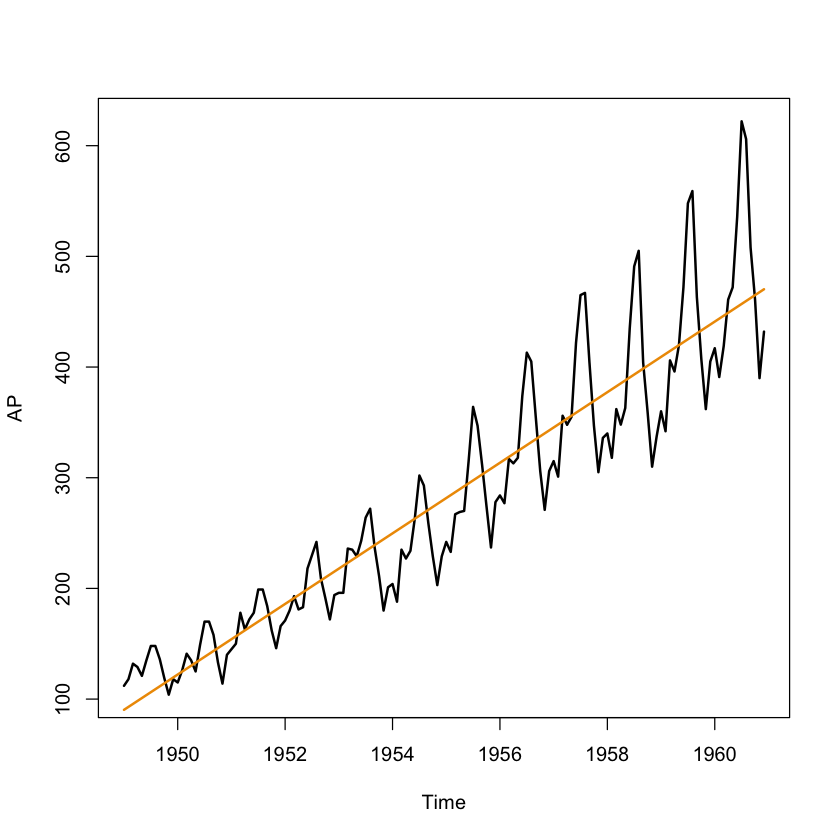

In [3]:
plot(AP,lwd=2)
points(time(AP),fitted(model1),col="orange2",lwd=2,type="l")

In [4]:
model2<-lm(AP~Time+I(Time^2))
#help(I)
summary(model2)


Call:
lm(formula = AP ~ Time + I(Time^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-100.353  -27.339   -7.442   21.603  146.116 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.124e+02  1.138e+01   9.872  < 2e-16 ***
Time        1.641e+00  3.625e-01   4.527 1.26e-05 ***
I(Time^2)   7.008e-03  2.421e-03   2.894  0.00441 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.91 on 141 degrees of freedom
Multiple R-squared:  0.8618,	Adjusted R-squared:  0.8599 
F-statistic: 439.8 on 2 and 141 DF,  p-value: < 2.2e-16


Model2: $y_t=\alpha_0+\alpha_1 t+\alpha_2 t^2+\varepsilon_t,\ t\in \mathbb{N}$

In [5]:
model2<-lm(AP~Time+I(Time^2))
summary(model2)


Call:
lm(formula = AP ~ Time + I(Time^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-100.353  -27.339   -7.442   21.603  146.116 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.124e+02  1.138e+01   9.872  < 2e-16 ***
Time        1.641e+00  3.625e-01   4.527 1.26e-05 ***
I(Time^2)   7.008e-03  2.421e-03   2.894  0.00441 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.91 on 141 degrees of freedom
Multiple R-squared:  0.8618,	Adjusted R-squared:  0.8599 
F-statistic: 439.8 on 2 and 141 DF,  p-value: < 2.2e-16


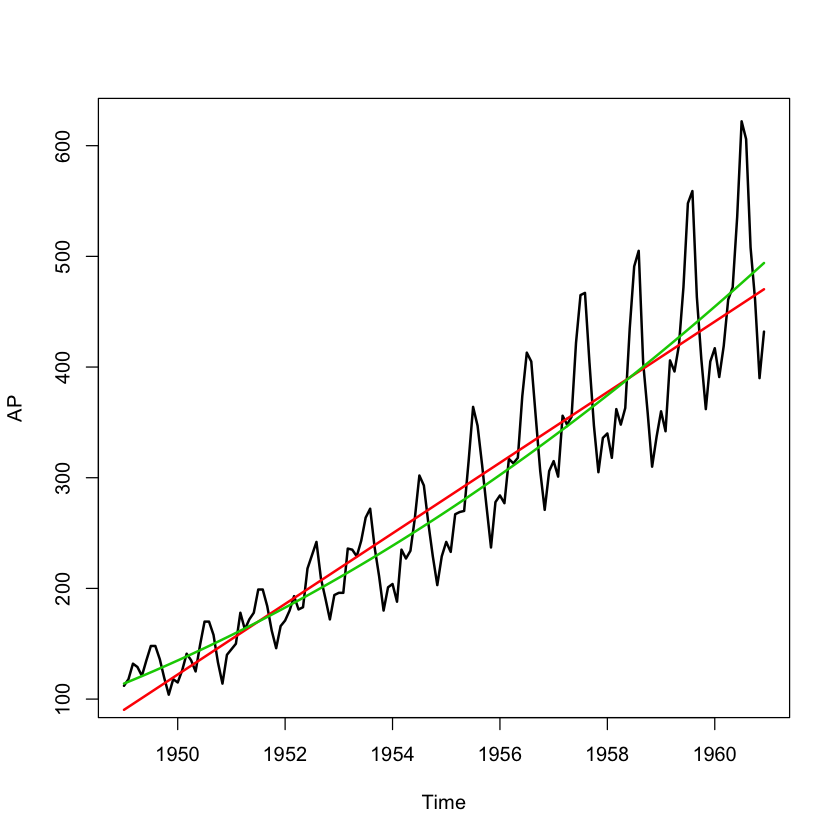

In [6]:
plot(AP,lwd=2)
points(time(AP),fitted(model1),col=2,lwd=2,type="l")
points(time(AP),fitted(model2),col=3,lwd=2,type="l")

# Trend and seasonality: $y_t=m(t)+s(t)+\varepsilon_t,\ t\in \mathbb{N}$

In [8]:
T=12
MC=matrix(0,length(AP),6)
MS=matrix(0,length(AP),6)
for (i in 1:(T/2)){MC[,i]=cos(2*pi*i*Time/T)}
for (i in 1:(T/2)){MS[,i]=sin(2*pi*i*Time/T)}


In [9]:
model3<-lm(AP~Time+MC+MS)
model4<-lm(AP~Time+I(Time^2)+MC+MS)
model5<-lm(log(AP)~Time+I(Time^2)+MC+MS)
summary(model3)
summary(model4)
summary(model5)



Call:
lm(formula = AP ~ Time + MC + MS)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.559 -18.176  -3.844  14.894  95.376 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.744e+01  4.436e+00  19.711  < 2e-16 ***
Time         2.659e+00  5.317e-02  50.019  < 2e-16 ***
MC1         -4.218e+01  3.115e+00 -13.542  < 2e-16 ***
MC2         -4.261e+00  3.117e+00  -1.367  0.17400    
MC3          8.461e+00  3.113e+00   2.718  0.00746 ** 
MC4          3.619e+00  3.115e+00   1.162  0.24748    
MC5          1.059e+00  3.173e+00   0.334  0.73918    
MC6         -2.911e-02  2.546e+00  -0.011  0.99089    
MS1         -1.804e+01  3.119e+00  -5.784 5.16e-08 ***
MS2          2.490e+01  3.114e+00   7.996 6.14e-13 ***
MS3         -3.867e+00  3.126e+00  -1.237  0.21833    
MS4          6.749e+00  3.113e+00   2.168  0.03196 *  
MS5          6.040e+00  3.119e+00   1.936  0.05500 .  
MS6         -6.198e+13  1.302e+14  -0.476  0.63495    
---
Signif. codes:  0 ‘**


Call:
lm(formula = AP ~ Time + I(Time^2) + MC + MS)

Residuals:
    Min      1Q  Median      3Q     Max 
-47.388 -13.055   0.584  12.570  76.079 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.127e+02  6.042e+00  18.646  < 2e-16 ***
Time         1.623e+00  1.922e-01   8.440 5.59e-14 ***
I(Time^2)    7.149e-03  1.284e-03   5.569 1.43e-07 ***
MC1         -4.229e+01  2.808e+00 -15.063  < 2e-16 ***
MC2         -4.270e+00  2.810e+00  -1.520  0.13107    
MC3          8.453e+00  2.806e+00   3.013  0.00311 ** 
MC4          3.626e+00  2.808e+00   1.291  0.19891    
MC5          1.106e+00  2.860e+00   0.387  0.69961    
MC6         -1.282e-01  2.294e+00  -0.056  0.95552    
MS1         -1.807e+01  2.811e+00  -6.428 2.29e-09 ***
MS2          2.488e+01  2.807e+00   8.864 5.33e-15 ***
MS3         -3.897e+00  2.818e+00  -1.383  0.16909    
MS4          6.747e+00  2.806e+00   2.405  0.01759 *  
MS5          6.022e+00  2.812e+00   2.142  0.03409 *  
MS6         -


Call:
lm(formula = log(AP) ~ Time + I(Time^2) + MC + MS)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.128389 -0.035747  0.004124  0.030625  0.116686 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.737e+00  1.225e-02 386.508  < 2e-16 ***
Time         1.318e-02  3.899e-04  33.794  < 2e-16 ***
I(Time^2)   -2.145e-05  2.604e-06  -8.239 1.69e-13 ***
MC1         -1.417e-01  5.694e-03 -24.878  < 2e-16 ***
MC2         -2.251e-02  5.699e-03  -3.951 0.000128 ***
MC3          2.730e-02  5.690e-03   4.798 4.35e-06 ***
MC4          2.232e-02  5.695e-03   3.920 0.000143 ***
MC5          6.378e-03  5.801e-03   1.099 0.273653    
MC6          1.152e-03  4.654e-03   0.248 0.804855    
MS1         -4.936e-02  5.702e-03  -8.657 1.69e-14 ***
MS2          7.862e-02  5.694e-03  13.808  < 2e-16 ***
MS3         -9.115e-03  5.715e-03  -1.595 0.113173    
MS4          2.567e-02  5.690e-03   4.512 1.43e-05 ***
MS5          2.108e-02  5.702e-03   3.697 0

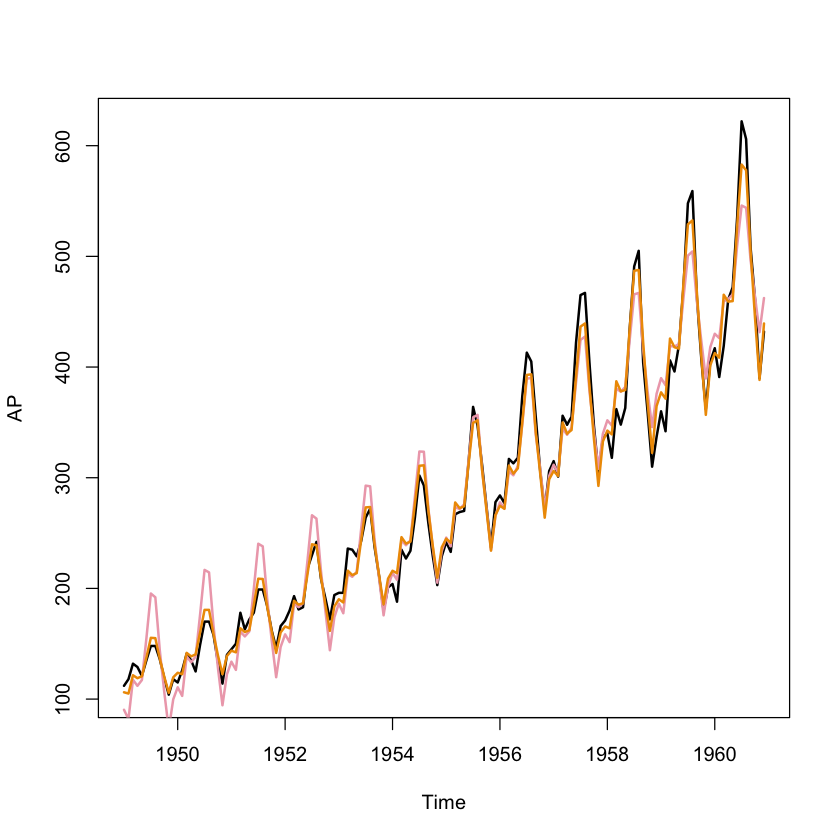

In [12]:
plot(AP,lwd=2)
#points(time(AP),fitted(model1),col=2,lwd=2,type="l")
#points(time(AP),fitted(model2),col=3,lwd=2,type="l")
#points(time(AP),fitted(model3),col="blue3",lwd=2,type="l")
points(time(AP),fitted(model4),col="pink2",lwd=2,type="l")
points(time(AP),exp(fitted(model5)),col="orange2",lwd=2,type="l")

In [11]:
AIC(model1)
AIC(model2)
AIC(model3)
AIC(model4)
AIC(model5)

[1] 1515.647

[1] 1509.337

[1] 1366.746

[1] 1337.724

[1] -448.0519

In [32]:
BIC(model1)
BIC(model2)
BIC(model3)
BIC(model4)
BIC(model5)

[1] 1524.556

[1] 1521.216

[1] 1411.293

[1] 1385.241

[1] -400.5349

In [16]:
names(model5)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

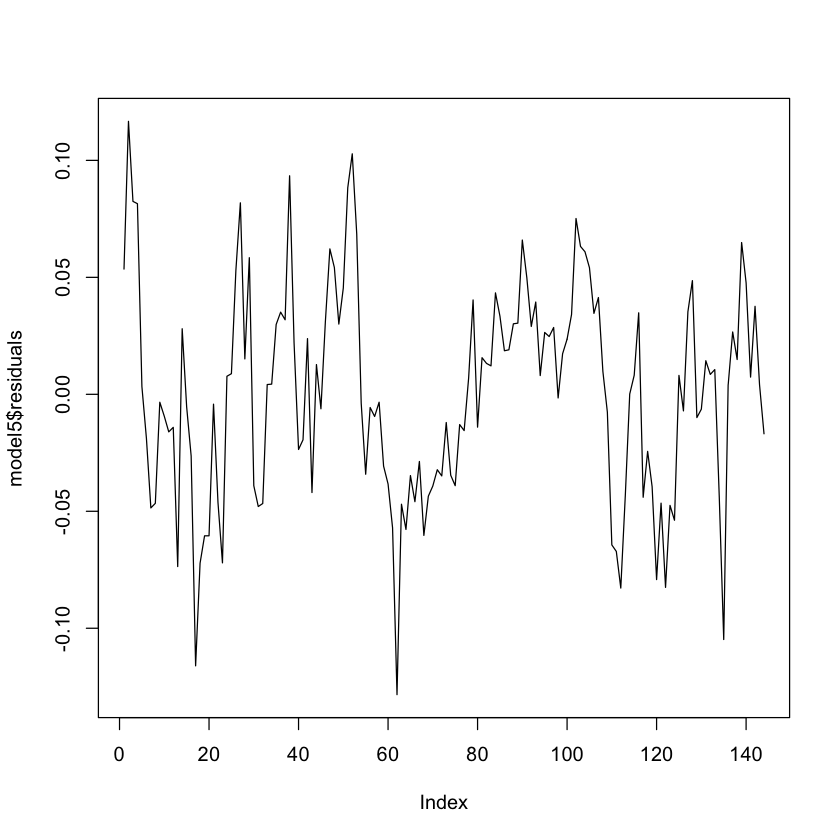

In [34]:
plot(model5$residuals,type="l")

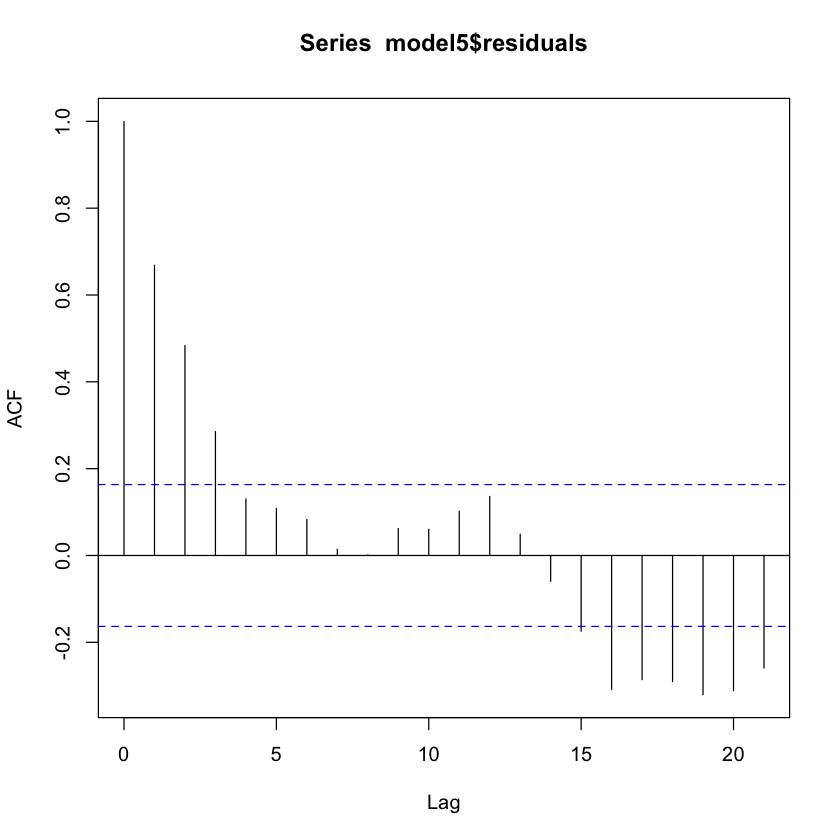

In [17]:
acf(model5$residuals)